In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as s
import numpy as np

# pd.set_option('display.max_rows', None) # code to not truncate dataframe when it is displayed



In [2]:
df = pd.read_csv("Resources/Data_Clean_hosp.csv")

df.head()

,Unnamed: 0,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,7184,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
1,7185,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
2,7186,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
3,7187,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN
4,7188,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,...,28.4,30.9,NaN,7.37,81.54,0.922,NaN,NaN,NaN,NaN


In [3]:
#changing date from string to datetime object
df["date"] = pd.to_datetime(df["date"],format='%Y-%m-%d')

type(df.iloc[0,4])

# df.iloc[0,4]

pandas._libs.tslibs.timestamps.Timestamp

In [4]:
#listing all columns

for _ in df.columns:
    print(_)

Unnamed: 0
iso_code
continent
location
date
total_cases
new_cases
new_cases_smoothed
total_deaths
new_deaths
new_deaths_smoothed
total_cases_per_million
new_cases_per_million
new_cases_smoothed_per_million
total_deaths_per_million
new_deaths_per_million
new_deaths_smoothed_per_million
reproduction_rate
icu_patients
icu_patients_per_million
hosp_patients
hosp_patients_per_million
weekly_icu_admissions
weekly_icu_admissions_per_million
weekly_hosp_admissions
weekly_hosp_admissions_per_million
new_tests
total_tests
total_tests_per_thousand
new_tests_per_thousand
new_tests_smoothed
new_tests_smoothed_per_thousand
positive_rate
tests_per_case
tests_units
total_vaccinations
people_vaccinated
people_fully_vaccinated
total_boosters
new_vaccinations
new_vaccinations_smoothed
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
total_boosters_per_hundred
new_vaccinations_smoothed_per_million
stringency_index
population
population_density
median_age
age

In [5]:
df.columns

Index(['Unnamed: 0', 'iso_code', 'continent', 'location', 'date',
       'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smooth

In [6]:
df_vax_hosp_icu = df[['iso_code',
                    'continent', 
                    'location', 
                    'date',
                    'total_cases', 
                    'new_cases', 
                    'total_deaths',
                    'new_deaths',
                    'icu_patients',
                    'hosp_patients',
                    'weekly_icu_admissions',
                       'weekly_hosp_admissions',
                       'new_tests', 
                      'total_tests',
                       'positive_rate',
                      'total_vaccinations',
                       'people_vaccinated', 
                      'people_fully_vaccinated',
                      'total_boosters',
                       'new_vaccinations',
                       'population',
                      'hospital_beds_per_thousand',
                       'excess_mortality_cumulative_absolute',
                      'excess_mortality_cumulative',
                       'excess_mortality']]

In [7]:
df_vax_hosp_icu

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,icu_patients,hosp_patients,...,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,population,hospital_beds_per_thousand,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality
0,AUT,Europe,Austria,2020-02-25,2.0,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
1,AUT,Europe,Austria,2020-02-26,2.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
2,AUT,Europe,Austria,2020-02-27,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
3,AUT,Europe,Austria,2020-02-28,3.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
4,AUT,Europe,Austria,2020-02-29,9.0,6.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9043072.0,7.37,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15413,USA,North America,United States,2021-10-16,44916737.0,32139.0,723765.0,397.0,16435.0,51706.0,...,407446961.0,218562924.0,188902483.0,10114824.0,876086.0,332915074.0,2.77,NaN,NaN,NaN
15414,USA,North America,United States,2021-10-17,44934357.0,17620.0,724110.0,345.0,16274.0,51361.0,...,408265959.0,218805579.0,189141481.0,10461286.0,818998.0,332915074.0,2.77,NaN,NaN,NaN
15415,USA,North America,United States,2021-10-18,45050910.0,116553.0,725835.0,1725.0,16375.0,51394.0,...,408797942.0,218973123.0,189292559.0,10681175.0,531983.0,332915074.0,2.77,NaN,NaN,NaN
15416,USA,North America,United States,2021-10-19,45132148.0,81238.0,728192.0,2357.0,16266.0,50832.0,...,409438987.0,219161368.0,189487793.0,10926564.0,641045.0,332915074.0,2.77,NaN,NaN,NaN


In [8]:
#listing all countries

countries = df["location"].unique()

print(f"This analysis involves data from {len(countries)} countries\n")

print(f"These countires are \n")

for x in countries:
    print(x)

This analysis involves data from 25 countries

These countires are 

Austria
Belgium
Bulgaria
Canada
Cyprus
Czechia
Denmark
Estonia
Finland
France
Germany
Ireland
Israel
Italy
Luxembourg
Malta
Netherlands
Portugal
Serbia
Slovenia
Spain
Sweden
Switzerland
United Kingdom
United States


In [12]:
df1 = df[["location","date","people_fully_vaccinated","new_cases","hosp_patients","icu_patients","new_deaths"]]

df1.head(10)

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
0,Austria,2020-02-25,NaN,2.0,NaN,NaN,NaN
1,Austria,2020-02-26,NaN,0.0,NaN,NaN,NaN
2,Austria,2020-02-27,NaN,1.0,NaN,NaN,NaN
3,Austria,2020-02-28,NaN,0.0,NaN,NaN,NaN
4,Austria,2020-02-29,NaN,6.0,NaN,NaN,NaN
5,Austria,2020-03-01,NaN,5.0,NaN,NaN,NaN
6,Austria,2020-03-02,NaN,4.0,NaN,NaN,NaN
7,Austria,2020-03-03,NaN,3.0,NaN,NaN,NaN
8,Austria,2020-03-04,NaN,8.0,NaN,NaN,NaN
9,Austria,2020-03-05,NaN,12.0,NaN,NaN,NaN


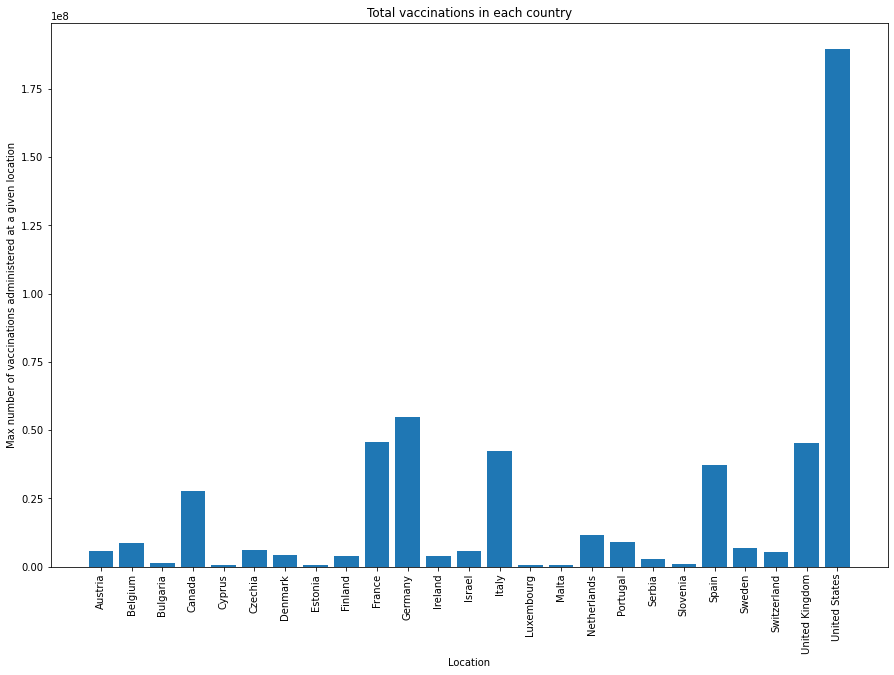

Based on the selected dataset, top countries with highest number of /n vvaccinations administered include US, UK, Spain, Italy, Germany, France and Canada


In [14]:
#Bar chart to show total number of vaccinations administered in a country
df1_grouped_location = df1.groupby(["location"]).max()

countries = df1["location"].unique()
total_vaccinations = df1_grouped_location["people_fully_vaccinated"]

plt.figure(figsize=(15,10))
plt.bar(countries,total_vaccinations)
plt.xticks(rotation="vertical")

# Set a Title and labels
plt.title("Total vaccinations in each country")
plt.xlabel("Location")
plt.ylabel("Max number of vaccinations administered at a given location")

# Save our graph and show the grap
plt.savefig("Output_Images/vaccinations_vs_location.png")
plt.show()

print(f"Based on the selected dataset, top countries with highest number of /n vvaccinations administered include US, UK, Spain, Italy, Germany, France and Canada")



In [16]:
df1.describe()

,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
count,5.911000e+03,15292.000000,13410.000000,13722.000000,14697.000000
mean,1.126427e+07,5942.521318,4688.137882,953.054511,103.362183
std,2.836226e+07,20505.643575,12711.078678,2976.329854,331.988277
min,1.000000e+00,-74347.000000,0.000000,0.000000,-1918.000000
25%,3.445340e+05,99.000000,119.000000,23.000000,1.000000
50%,1.499547e+06,590.000000,583.500000,121.000000,7.000000
75%,5.681000e+06,3207.500000,2833.750000,522.000000,49.000000
max,1.897097e+08,303008.000000,133253.000000,28891.000000,4441.000000


In [17]:
#groupby week and location

df1_week = df1.groupby(['location', pd.Grouper(key='date', freq='W-MON')]).mean().reset_index().sort_values(['location', 'date'])

# df1_week = df1.groupby(['location', pd.Grouper(key='date', freq='W-MON')])

df1_week.head(10)

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
0,Austria,2020-03-02,NaN,2.571429,NaN,NaN,NaN
1,Austria,2020-03-09,NaN,16.142857,NaN,NaN,NaN
2,Austria,2020-03-16,NaN,126.714286,NaN,NaN,0.600000
3,Austria,2020-03-23,NaN,493.714286,NaN,NaN,2.571429
4,Austria,2020-03-30,NaN,734.857143,NaN,NaN,12.428571
5,Austria,2020-04-06,NaN,382.714286,811.666667,236.333333,16.000000
6,Austria,2020-04-13,NaN,249.142857,800.142857,252.000000,21.142857
7,Austria,2020-04-20,NaN,107.714286,687.142857,220.857143,14.571429
8,Austria,2020-04-27,NaN,68.428571,490.714286,161.428571,11.285714
9,Austria,2020-05-04,NaN,49.571429,351.714286,122.571429,7.285714


In [18]:
df1_week.describe()

,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
count,1.005000e+03,2213.000000,2057.000000,2028.000000,2127.000000
mean,1.052451e+07,5932.997458,4618.107472,948.371028,103.197379
std,2.726653e+07,19495.544734,12363.397601,2949.084355,313.011705
min,1.000000e+00,-6223.000000,0.000000,0.000000,-125.000000
25%,3.286090e+05,146.000000,121.142857,22.714286,1.714286
50%,1.476305e+06,709.857143,595.571429,116.071429,8.428571
75%,5.681526e+06,3508.857143,3005.285714,528.142857,53.000000
max,1.895988e+08,251863.571429,127988.714286,28469.714286,3306.285714


In [19]:
# location = name of the country
# columns = in form of list e.g columns = ['people_fully_vaccinated','hosp_patients']
# q_date = 

def analyse_location(df,location,columns):
    df1_result = df[df["location"]==location]
    
    df1_result.dropna(inplace=True)
    
    if len(df1_result) > 0:
#         df1_result = df1_result.set_index(["date"])
#         df1_result = df1_result.loc[f"{q_date}"]

        
        x_axis = df1_result[columns[0]]
        y_axis = df1_result[columns[1]]
        
        plt.plot(x_axis,y_axis)
        
        if type(x_axis) == float & type(y_axis) == float:
            correlation = s.pearsonr(x_axis,y_axis)[0]
            print(f"correlation is {correlation} ")
        
#     print(df1_result.head())
    

In [ ]:
# location = df1_week["location"]
# date = df1_week["date"]
# people_fully_vaccinated = df1_week["people_fully_vaccinated"]
# new_cases = df1_week["new_cases"]
# hosp_patients = df1_week["hosp_patients"].dropna(inplace=True)
# icu_patients = df1_week["icu_patients"].dropna(inplace=True)
# new_deaths = df1_week["new_deaths"].dropna(inplace=True)

In [ ]:
columns = ['date','people_fully_vaccinated']

analyse_location(df1_week,"United States",columns)

In [20]:
df1_USA = df1_week[df1_week["location"]=="United States"]

df1_USA

,location,date,people_fully_vaccinated,new_cases,hosp_patients,icu_patients,new_deaths
2156,United States,2020-01-27,NaN,0.800000,NaN,NaN,NaN
2157,United States,2020-02-03,NaN,0.857143,NaN,NaN,NaN
2158,United States,2020-02-10,NaN,0.142857,NaN,NaN,NaN
2159,United States,2020-02-17,NaN,0.285714,NaN,NaN,NaN
2160,United States,2020-02-24,NaN,0.285714,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2243,United States,2021-09-27,1.829799e+08,117207.428571,77549.571429,22278.285714,2055.857143
2244,United States,2021-10-04,1.850356e+08,105054.000000,67578.714286,19533.428571,1801.428571
2245,United States,2021-10-11,1.866395e+08,86304.285714,59936.714286,17785.428571,1479.142857
2246,United States,2021-10-18,1.885608e+08,84932.142857,53596.000000,17006.428571,1662.571429


In [21]:
location = df1_week["location"]
date = df1_week["date"]
people_fully_vaccinated = df1_week["people_fully_vaccinated"]
new_cases = df1_week["new_cases"]
hosp_patients = df1_week["hosp_patients"]
icu_patients = df1_week["icu_patients"]
new_deaths = df1_week["new_deaths"]

In [22]:
#simple function for line plot for rate of change of the 4 variables againt time

def line_plot(x_axis, y_axis):
    plt.plot(x_axis,y_axis)
    plt.show()

In [ ]:
# location = df1_week["location"]
# date = df1_week["date"]
# people_fully_vaccinated = df1_week["people_fully_vaccinated"].dropna(inplace=True)
# new_cases = df1_week["new_cases"].dropna(inplace=True)
# hosp_patients = df1_week["hosp_patients"].dropna(inplace=True)
# icu_patients = df1_week["icu_patients"].dropna(inplace=True)
# new_deaths = df1_week["new_deaths"].dropna(inplace=True)

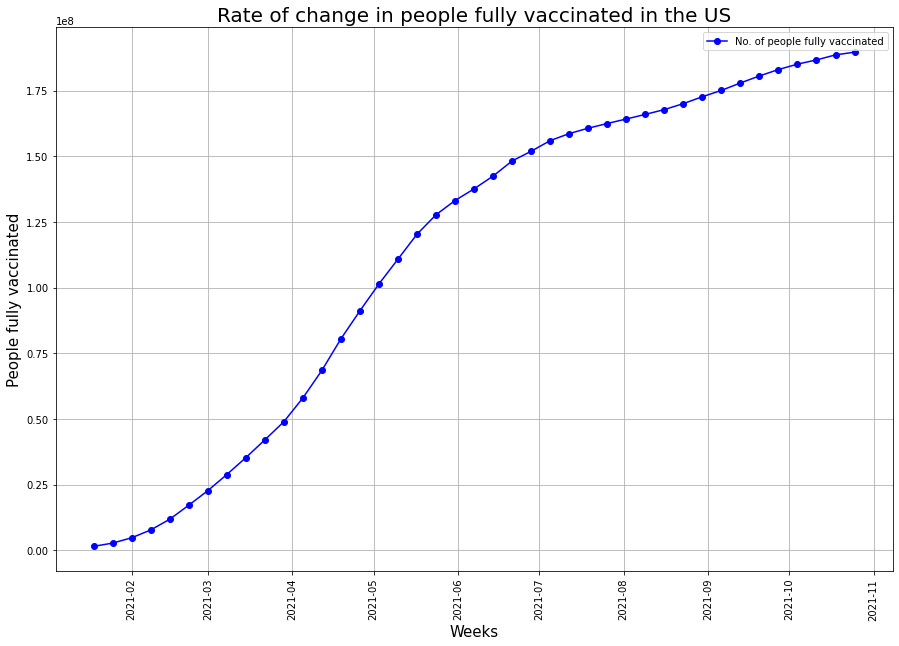

In [23]:
#plot to demostrate rate of change in number of vaccinations for USA

x_axis1 = df1_USA["date"]
y_axis1 = df1_USA["people_fully_vaccinated"]

plt.figure(figsize=(15,10))
plt.plot(x_axis1,y_axis1, marker ='o', color='blue', label="No. of people fully vaccinated")
plt.xticks(rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("Rate of change in people fully vaccinated in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("People fully vaccinated", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot1_USA.png")
plt.show()


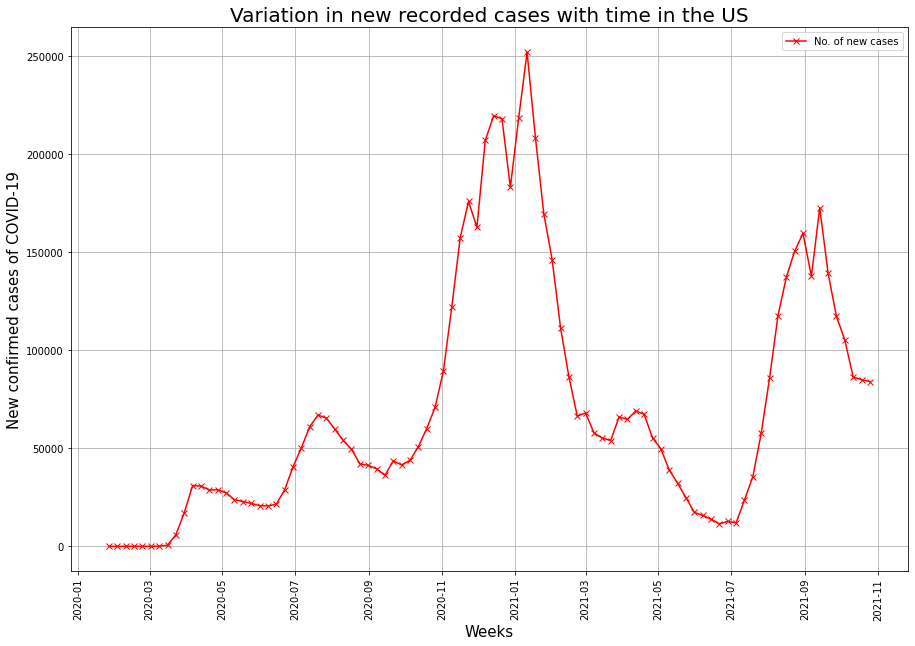

In [24]:
#plot to demostrate variation in new cases with time in the US

x_axis2 = df1_USA["date"]
y_axis2 = df1_USA["new_cases"]

plt.figure(figsize=(15,10))
plt.plot(x_axis2,y_axis2, marker ='x', color='red', label= "No. of new cases")
plt.xticks(rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("Variation in new recorded cases with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("New confirmed cases of COVID-19", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot2_USA.png")
plt.show()

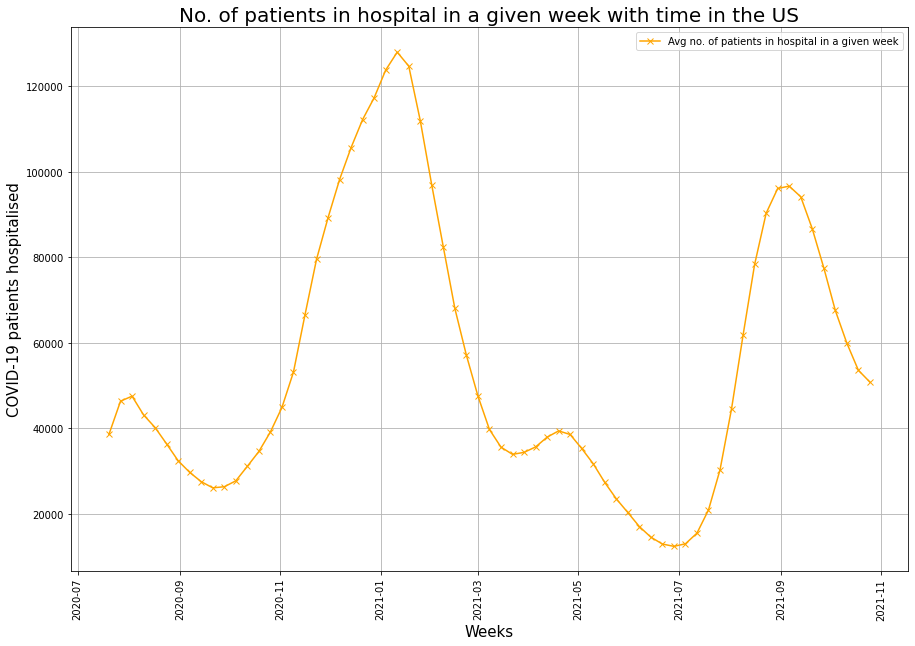

In [25]:
#plot to demostrate no. of patients in hospital in a given week with time in the US

x_axis3 = df1_USA["date"]
y_axis3 = df1_USA["hosp_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis3,y_axis3, marker ='x', color='orange', label= "Avg no. of patients in hospital in a given week")
plt.xticks(rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients hospitalised", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot3_USA.png")
plt.show()

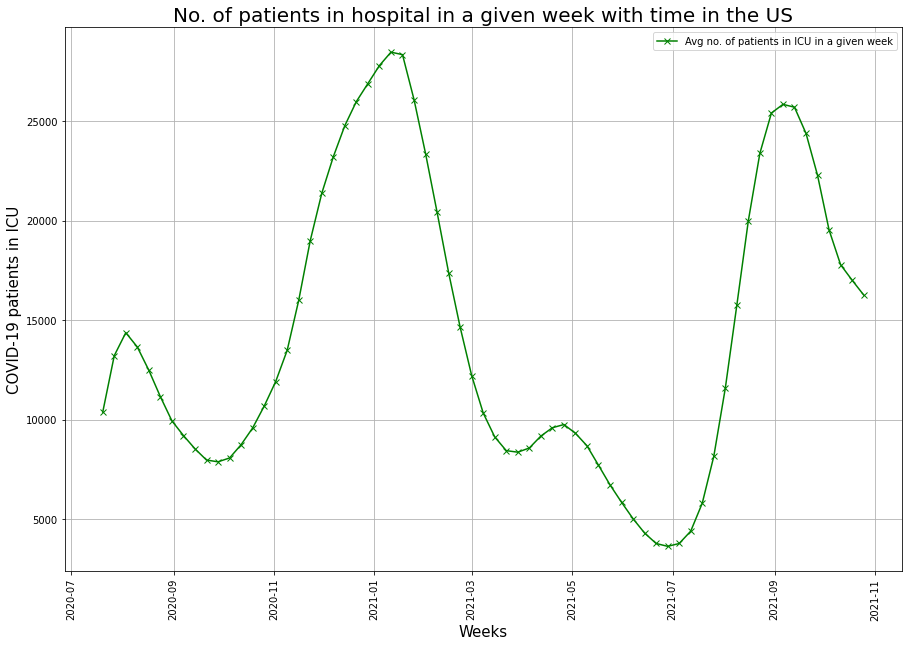

In [28]:
#plot to demostrate no. of patients in ICU in a given week with time in the US

x_axis4 = df1_USA["date"]
y_axis4 = df1_USA["icu_patients"]

plt.figure(figsize=(15,10))
plt.plot(x_axis4,y_axis4, marker ='x', color='green', label= "Avg no. of patients in ICU in a given week")
plt.xticks(rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of patients in hospital in a given week with time in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("COVID-19 patients in ICU", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot4_USA.png")
plt.show()

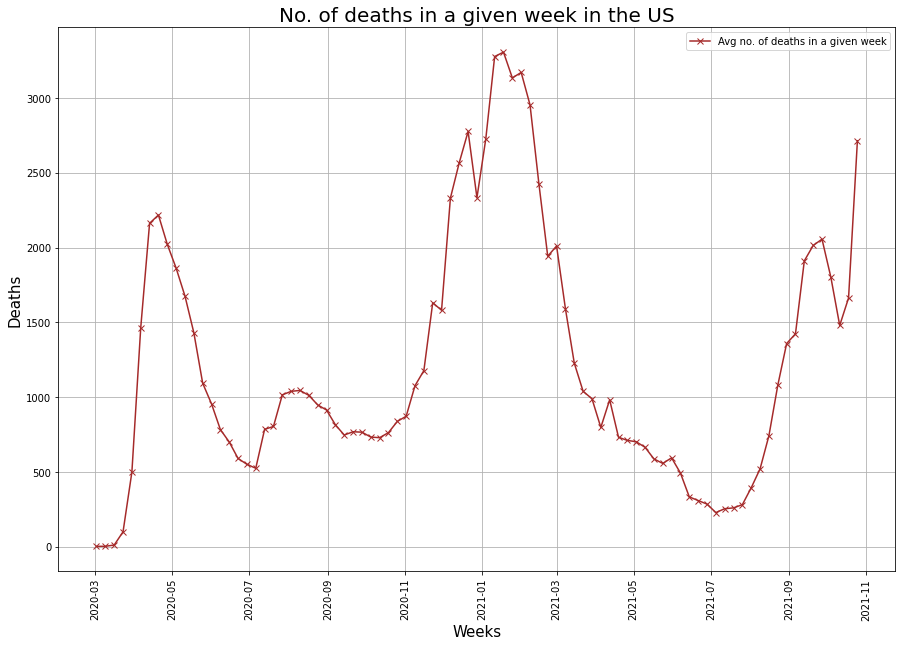

In [30]:
#plot to demostrate no. of deaths in a given week in the US

x_axis5 = df1_USA["date"]
y_axis5 = df1_USA["new_deaths"]

plt.figure(figsize=(15,10))
plt.plot(x_axis5,y_axis5, marker ='x', color='brown', label= "Avg no. of deaths in a given week")
plt.xticks(rotation="vertical")

# Create title and labels for the X and Y axis
plt.title("No. of deaths in a given week in the US", fontsize = 20)
plt.xlabel("Weeks", fontsize = 15)
plt.ylabel("Deaths", fontsize = 15)

# Adds a legend and sets its location to the lower right
plt.legend(loc="best")

# # Set the limits for the X and Y axes
# plt.xlim(0,120)
# plt.ylim(5,95)

# Add in a grid for the chart
plt.grid()

# Saves an image of our chart so that we can view it in a folder
plt.savefig("Output_Images/line_plot5_USA.png")
plt.show()